In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
db = pd.read_csv('/content/diabetes.csv')
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
db['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
from sklearn.utils import resample, shuffle

In [8]:
out_up = resample(db[db['Outcome'] == 1], replace = True, n_samples = 450)
out_up

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
480,3,158,70,30,328,35.5,0.344,35,1
255,1,113,64,35,0,33.6,0.543,21,1
37,9,102,76,37,0,32.9,0.665,46,1
238,9,164,84,21,0,30.8,0.831,32,1
375,12,140,82,43,325,39.2,0.528,58,1
...,...,...,...,...,...,...,...,...,...
312,2,155,74,17,96,26.6,0.433,27,1
746,1,147,94,41,0,49.3,0.358,27,1
388,5,144,82,26,285,32.0,0.452,58,1
88,15,136,70,32,110,37.1,0.153,43,1


In [9]:
out_down = db[db['Outcome'] == 0]
out_down

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [10]:
result = [out_up, out_down]

In [11]:
db_new = pd.concat(result)

In [12]:
db_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
480,3,158,70,30,328,35.5,0.344,35,1
255,1,113,64,35,0,33.6,0.543,21,1
37,9,102,76,37,0,32.9,0.665,46,1
238,9,164,84,21,0,30.8,0.831,32,1
375,12,140,82,43,325,39.2,0.528,58,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [14]:
db_final = shuffle(db_new)
db_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
652,5,123,74,40,77,34.1,0.269,28,0
501,3,84,72,32,0,37.2,0.267,28,0
128,1,117,88,24,145,34.5,0.403,40,1
25,10,125,70,26,115,31.1,0.205,41,1
231,6,134,80,37,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
598,1,173,74,0,0,36.8,0.088,38,1
459,9,134,74,33,60,25.9,0.460,81,0
591,2,112,78,50,140,39.4,0.175,24,0
157,1,109,56,21,135,25.2,0.833,23,0


In [15]:
y = db_final['Outcome']
y

652    0
501    0
128    1
25     1
231    1
      ..
598    1
459    0
591    0
157    0
312    1
Name: Outcome, Length: 950, dtype: int64

In [16]:
X = db_final.drop(['Outcome'], axis = 1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
652,5,123,74,40,77,34.1,0.269,28
501,3,84,72,32,0,37.2,0.267,28
128,1,117,88,24,145,34.5,0.403,40
25,10,125,70,26,115,31.1,0.205,41
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
598,1,173,74,0,0,36.8,0.088,38
459,9,134,74,33,60,25.9,0.460,81
591,2,112,78,50,140,39.4,0.175,24
157,1,109,56,21,135,25.2,0.833,23


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.29400981, -0.05319075,  0.21905037, ...,  0.185157  ,
        -0.65331974, -0.49150512],
       [-0.28909941, -1.25926017,  0.1116173 , ...,  0.57523309,
        -0.65947528, -0.49150512],
       [-0.87220864, -0.2387399 ,  0.97108186, ...,  0.2354894 ,
        -0.24089863,  0.55347033],
       ...,
       [-0.58065403, -0.39336418,  0.43391651, ...,  0.85206128,
        -0.94263007, -0.83983027],
       [-0.87220864, -0.48613875, -0.74784725, ..., -0.93473887,
         1.08254223, -0.92691156],
       [-0.58065403,  0.93640467,  0.21905037, ..., -0.75857547,
        -0.14856555, -0.57858641]])

In [18]:
from sklearn.model_selection import train_test_split

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 100)
X_scaled_train.shape, X_scaled_test.shape, y_train.shape, y_test.shape

((760, 8), (190, 8), (760,), (190,))

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5966 - accuracy: 0.7197
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.7526
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7526
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7553
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7618
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7592
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.7684
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7632
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7645
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7658
Epoch 11/

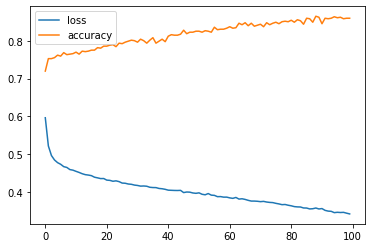

In [19]:
# Building the model

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(300, activation = 'relu'))
model_1.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the model

tf.random.set_seed(100)
hist_1 = model_1.fit(X_scaled_train, y_train, epochs = 100)
pd.DataFrame(hist_1.history).plot();

In [20]:
# Evaluation of the model

test_accuracy = model_1.evaluate(X_scaled_test, y_test)
print("The Accuracy:", test_accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8211
The Accuracy: [0.43852850794792175, 0.821052610874176]


###**Result**

**Model 1:** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

In [21]:
# Using Normalized Dataset

norm = tf.keras.layers.Normalization()
norm.adapt(X_scaled_train)
norm.adapt(X_scaled_test)
X_train_norm = norm(X_scaled_train)
X_test_norm = norm(X_scaled_test)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.6009 - accuracy: 0.7158
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.7513
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7632
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.7645
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7671
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7684
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4704 - accuracy: 0.7605
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7724
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4625 - accuracy: 0.7711
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7632
Epoch 11/

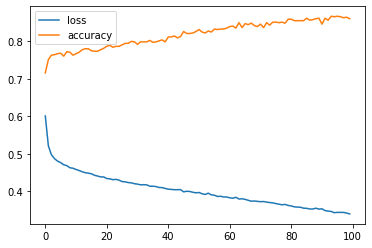

In [22]:
# Building the model

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(300, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the model

tf.random.set_seed(100)
hist_2 = model_2.fit(X_train_norm, y_train, epochs = 100)
pd.DataFrame(hist_2.history).plot();

In [23]:
# Evaluation of the model

test_accuracy_2 = model_2.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_2)

6/6 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8211
The Accuracy: [0.4419959485530853, 0.821052610874176]


###**Result**

**Model 1:** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2:** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

Epoch 1/100
19/19 [==============================] - 1s 15ms/step - loss: 0.6330 - accuracy: 0.6678 - val_loss: 0.5847 - val_accuracy: 0.7566
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7385 - val_loss: 0.5489 - val_accuracy: 0.7368
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7681 - val_loss: 0.5374 - val_accuracy: 0.7237
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.7664 - val_loss: 0.5343 - val_accuracy: 0.7237
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7632 - val_loss: 0.5340 - val_accuracy: 0.7368
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7648 - val_loss: 0.5336 - val_accuracy: 0.7237
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7714 - val_loss: 0.5341 - val_accuracy: 0.7368
Epoch 8/100


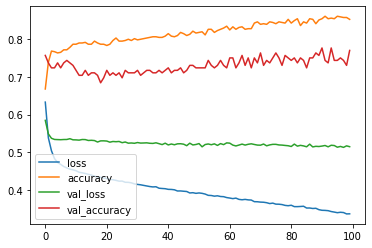

In [24]:
# Building model with Cross-Validation

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(300, activation = 'relu'))
model_3.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the model

tf.random.set_seed(100)
hist_3 = model_3.fit(X_train_norm, y_train, epochs = 100, validation_split = 0.2)
pd.DataFrame(hist_3.history).plot();

In [25]:
# Evaluation of the model

test_accuracy_3 = model_3.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_3)

6/6 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.8211
The Accuracy: [0.4575354754924774, 0.821052610874176]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

Epoch 1/100
19/19 [==============================] - 1s 31ms/step - loss: 0.6186 - accuracy: 0.6990 - val_loss: 0.5800 - val_accuracy: 0.7303
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.7352 - val_loss: 0.5487 - val_accuracy: 0.7368
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4977 - accuracy: 0.7516 - val_loss: 0.5410 - val_accuracy: 0.7171
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7681 - val_loss: 0.5382 - val_accuracy: 0.7303
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4713 - accuracy: 0.7714 - val_loss: 0.5375 - val_accuracy: 0.7368
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.7747 - val_loss: 0.5361 - val_accuracy: 0.7303
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.7812 - val_loss: 0.5355 - val_accuracy: 0.7434
Epoch 8/100


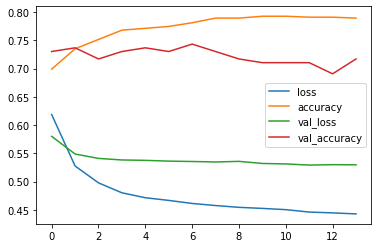

In [26]:
# Building model with Early Stopping

model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(300, activation = 'relu'))
model_4.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Early Stopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

# Training the model

tf.random.set_seed(100)
hist_4 = model_4.fit(X_train_norm, y_train, epochs = 100, validation_split = 0.2, callbacks = [early_stop])
pd.DataFrame(hist_4.history).plot();

In [27]:
# Evaluation of the model

test_accuracy_4 = model_4.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_4)

6/6 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7684
The Accuracy: [0.49723538756370544, 0.7684210538864136]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

Epoch 1/100
24/24 [==============================] - 1s 5ms/step - loss: 0.6332 - accuracy: 0.6605
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5354 - accuracy: 0.7421
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.7539
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7592
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7658
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7684
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7697
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7724
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7737
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7592
Epoch 11/

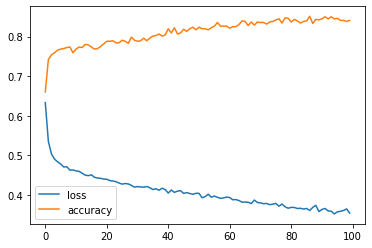

In [28]:
# Building Model with Dropout

model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Adding the drop out layer

model_5.add(tf.keras.layers.Dropout(0.1))

model_5.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


# Training the model

tf.random.set_seed(100)
hist_5 = model_5.fit(X_train_norm, y_train, epochs = 100)
pd.DataFrame(hist_5.history).plot();

In [29]:
# Evaluation of the model

test_accuracy_5 = model_5.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_5)

6/6 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8316
The Accuracy: [0.4390751123428345, 0.8315789699554443]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

**Model 5 (Dropout):** Training Loss: 0.3546, Test Loss: 0.4391, Accuracy: 0.8316 [Overfitting, Model improved]

Epoch 1/100
19/19 [==============================] - 1s 17ms/step - loss: 0.6399 - accuracy: 0.6316 - val_loss: 0.5926 - val_accuracy: 0.7303
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7368 - val_loss: 0.5554 - val_accuracy: 0.7237
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7582 - val_loss: 0.5436 - val_accuracy: 0.7303
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.7664 - val_loss: 0.5388 - val_accuracy: 0.7303
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7681 - val_loss: 0.5367 - val_accuracy: 0.7303
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.7664 - val_loss: 0.5362 - val_accuracy: 0.7303
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.7714 - val_loss: 0.5361 - val_accuracy: 0.7303
Epoch 8/100


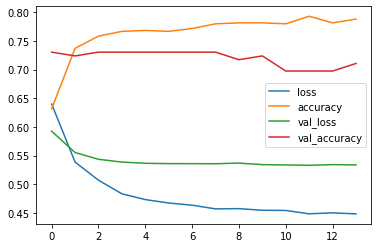

In [30]:
# Building the model with Dropout and implementing validation split with early stop

model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Adding the drop out layer

model_6.add(tf.keras.layers.Dropout(0.1))

model_6.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Early Stopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

# Training the model

tf.random.set_seed(100)
hist_6 = model_6.fit(X_train_norm, y_train, epochs = 100, validation_split = 0.2, callbacks = [early_stop])
pd.DataFrame(hist_6.history).plot();

In [31]:
# Evaluation of the model

test_accuracy_6 = model_6.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_6)

6/6 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7632
The Accuracy: [0.4955240786075592, 0.7631579041481018]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

**Model 5 (Dropout):** Training Loss: 0.3546, Test Loss: 0.4391, Accuracy: 0.8316 [Overfitting, Model improved]

**Model 6 (Dropout with validation split and early stop):** Training Loss: 0.4486, Test Loss: 0.4955, Accuracy: 0.7632 [Overfitting, Model did not improve]

**Model 5** has been the best model till now

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6072 - accuracy: 0.6895
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7671
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7789
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7711
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8000
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7908
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7947
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8224
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8092
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8263
Epoch 11/

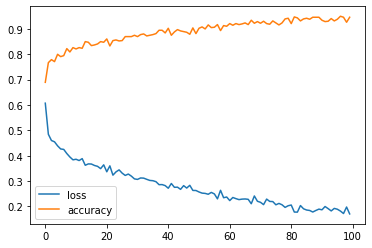

In [32]:
# Building model with Batch Normalization

model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Adding Batch Normalization

model_7.add(tf.keras.layers.BatchNormalization())

model_7.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


# Training the model

tf.random.set_seed(100)
hist_7 = model_7.fit(X_train_norm, y_train, epochs = 100)
pd.DataFrame(hist_7.history).plot();

In [33]:
# Evaluation of the model

test_accuracy_7 = model_7.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_7)

6/6 [==============================] - 0s 5ms/step - loss: 0.4080 - accuracy: 0.8474
The Accuracy: [0.4079671800136566, 0.8473684191703796]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

**Model 5 (Dropout):** Training Loss: 0.3546, Test Loss: 0.4391, Accuracy: 0.8316 [Overfitting, Model improved]

**Model 6 (Dropout with validation split and early stop):** Training Loss: 0.4486, Test Loss: 0.4955, Accuracy: 0.7632 [Overfitting, Model did not improve]

**Model 7 (BatchNormalization):** Training Loss: 0.1706, Test Loss: 0.4080, Accuracy: 0.8474 [Overfitting, Model did not improve]

**Model 7** has been the best model till now

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.5510 - accuracy: 0.7336 - val_loss: 0.6231 - val_accuracy: 0.6974
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7599 - val_loss: 0.6261 - val_accuracy: 0.6908
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.7845 - val_loss: 0.6224 - val_accuracy: 0.6908
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8043 - val_loss: 0.6129 - val_accuracy: 0.7105
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8125 - val_loss: 0.6048 - val_accuracy: 0.7039
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8207 - val_loss: 0.5983 - val_accuracy: 0.6908
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8191 - val_loss: 0.5903 - val_accuracy: 0.7039
Epoch 8/100


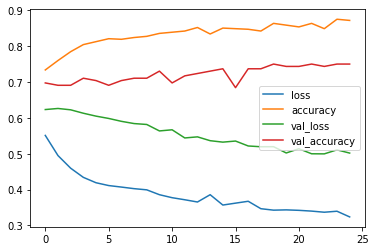

In [34]:
# Building the model with BatchNormalization along with Early Stop and Validation split

model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Adding Batch Normalization

model_8.add(tf.keras.layers.BatchNormalization())

model_8.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Early Stopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

# Training the model

tf.random.set_seed(100)
hist_8 = model_8.fit(X_train_norm, y_train, epochs = 100, validation_split = 0.2, callbacks = [early_stop])
pd.DataFrame(hist_8.history).plot();

In [35]:
# Evaluation of the model

test_accuracy_8 = model_8.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_8)

6/6 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8158
The Accuracy: [0.4561920166015625, 0.8157894611358643]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

**Model 5 (Dropout):** Training Loss: 0.3546, Test Loss: 0.4391, Accuracy: 0.8316 [Overfitting, Model improved]

**Model 6 (Dropout with validation split and early stop):** Training Loss: 0.4486, Test Loss: 0.4955, Accuracy: 0.7632 [Overfitting, Model did not improve]

**Model 7 (BatchNormalization):** Training Loss: 0.1706, Test Loss: 0.4080, Accuracy: 0.8474 [Overfitting, Model did not improve]

**Model 8 (BatchNormalization, Early Stop and Validation Split):** Training Loss: 0.3237, Test Loss: 0.4562, Accuracy: 0.8158 [Overfitting, Model did not improve]

**Model 7** has been the best model till now

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5685 - accuracy: 0.7237
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7724
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8092
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8079
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8329
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8197
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8329
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8658
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3025 - accuracy: 0.8763
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8921
Epoch 11/

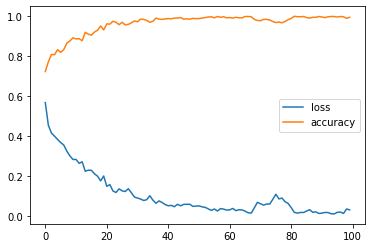

In [36]:
# Building the model with 2 hidden layers

model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(300, activation = 'relu'))
model_9.add(tf.keras.layers.Dense(100, activation = 'relu'))

# Adding Batch Normalization

model_9.add(tf.keras.layers.BatchNormalization())

model_9.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


# Training the model

tf.random.set_seed(100)
hist_9 = model_9.fit(X_train_norm, y_train, epochs = 100)
pd.DataFrame(hist_9.history).plot();

In [37]:
# Evaluation of the model

test_accuracy_9 = model_9.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_9)

6/6 [==============================] - 0s 3ms/step - loss: 0.5343 - accuracy: 0.8526
The Accuracy: [0.5343268513679504, 0.8526315689086914]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

**Model 5 (Dropout):** Training Loss: 0.3546, Test Loss: 0.4391, Accuracy: 0.8316 [Overfitting, Model improved]

**Model 6 (Dropout with validation split and early stop):** Training Loss: 0.4486, Test Loss: 0.4955, Accuracy: 0.7632 [Overfitting, Model did not improve]

**Model 7 (BatchNormalization):** Training Loss: 0.1706, Test Loss: 0.4080, Accuracy: 0.8474 [Overfitting, Model did not improve]

**Model 8 (BatchNormalization, Early Stop and Validation Split):** Training Loss: 0.3237, Test Loss: 0.4562, Accuracy: 0.8158 [Overfitting, Model did not improve]

**Model 9 (2 Hidden Layers):** Training Loss: 0.0326, Test Loss: 0.5343, Accuracy: 0.8526 [Overfitting, Model did not improve]

**Model 7** has been the best model till now

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6482 - accuracy: 0.7079
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7908
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8079
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8079
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8237
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8237
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8342
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8592
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8711
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8855
Epoch 11/

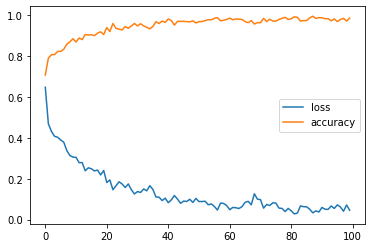

In [38]:
# Building the model with 2 hidden layers and BatchNormalization after each Hidden Layer

model_10 = tf.keras.Sequential()
model_10.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Adding Batch Normalization

model_10.add(tf.keras.layers.BatchNormalization())

model_10.add(tf.keras.layers.Dense(100, activation = 'relu'))

# Adding Batch Normalization

model_10.add(tf.keras.layers.BatchNormalization())

model_10.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


# Training the model

tf.random.set_seed(100)
hist_10 = model_10.fit(X_train_norm, y_train, epochs = 100)
pd.DataFrame(hist_10.history).plot();

In [39]:
# Evaluation of the model

test_accuracy_10 = model_10.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_10)

6/6 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.8053
The Accuracy: [0.6965782046318054, 0.8052631616592407]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

**Model 5 (Dropout):** Training Loss: 0.3546, Test Loss: 0.4391, Accuracy: 0.8316 [Overfitting, Model improved]

**Model 6 (Dropout with validation split and early stop):** Training Loss: 0.4486, Test Loss: 0.4955, Accuracy: 0.7632 [Overfitting, Model did not improve]

**Model 7 (BatchNormalization):** Training Loss: 0.1706, Test Loss: 0.4080, Accuracy: 0.8474 [Overfitting, Model did not improve]

**Model 8 (BatchNormalization, Early Stop and Validation Split):** Training Loss: 0.3237, Test Loss: 0.4562, Accuracy: 0.8158 [Overfitting, Model did not improve]

**Model 9 (2 Hidden Layers):** Training Loss: 0.0326, Test Loss: 0.5343, Accuracy: 0.8526 [Overfitting, Model did not improve]

**Model 10 (2 Hidden Layers and Batch Normalization after each layer):** Training Loss: 0.0452, Test Loss: 0.6966, Accuracy: 0.8053 [High Overfitting, Model did not improve]

**Model 7** has been the best model till now

Epoch 1/100
24/24 [==============================] - 2s 2ms/step - loss: 0.6009 - accuracy: 0.6987
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7539
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7605
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7408
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7763
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7645
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7658
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7750
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.7895
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.7882
Epoch 11/

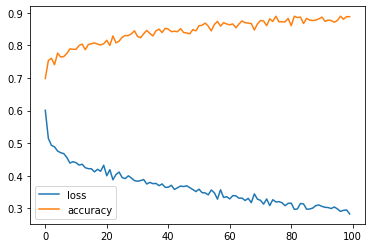

In [40]:
# Building model with changing the number of units

model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Dense(100, activation = 'relu'))

# Adding Batch Normalization

model_11.add(tf.keras.layers.BatchNormalization())

model_11.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_11.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


# Training the model

tf.random.set_seed(100)
hist_11 = model_11.fit(X_train_norm, y_train, epochs = 100)
pd.DataFrame(hist_11.history).plot();

In [41]:
# Evaluation of the model

test_accuracy_11 = model_11.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_11)

6/6 [==============================] - 0s 4ms/step - loss: 0.4319 - accuracy: 0.8158
The Accuracy: [0.4319145977497101, 0.8157894611358643]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

**Model 5 (Dropout):** Training Loss: 0.3546, Test Loss: 0.4391, Accuracy: 0.8316 [Overfitting, Model improved]

**Model 6 (Dropout with validation split and early stop):** Training Loss: 0.4486, Test Loss: 0.4955, Accuracy: 0.7632 [Overfitting, Model did not improve]

**Model 7 (BatchNormalization):** Training Loss: 0.1706, Test Loss: 0.4080, Accuracy: 0.8474 [Overfitting, Model did not improve]

**Model 8 (BatchNormalization, Early Stop and Validation Split):** Training Loss: 0.3237, Test Loss: 0.4562, Accuracy: 0.8158 [Overfitting, Model did not improve]

**Model 9 (2 Hidden Layers):** Training Loss: 0.0326, Test Loss: 0.5343, Accuracy: 0.8526 [Overfitting, Model did not improve]

**Model 10 (2 Hidden Layers and Batch Normalization after each layer):** Training Loss: 0.0452, Test Loss: 0.6966, Accuracy: 0.8053 [High Overfitting, Model did not improve]

**Model 11 (Changing the no of units : 100):** Training Loss: 0.2832, Test Loss: 0.4319, Accuracy: 0.8158 [High Overfitting, Model did not improve]

**Model 7** has been the best model till now

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.8867 - accuracy: 0.5145
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.6882
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.7276
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7408
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.7474
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7421
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7408
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7605
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7645
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7724
Epoch 11/

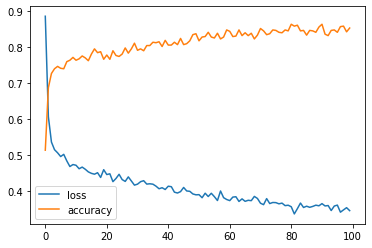

In [42]:
# Building model with changing the number of units, i.e. 50

model_12 = tf.keras.Sequential()
model_12.add(tf.keras.layers.Dense(50, activation = 'relu'))

# Adding Batch Normalization

model_12.add(tf.keras.layers.BatchNormalization())

model_12.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model

model_12.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


# Training the model

tf.random.set_seed(100)
hist_12 = model_12.fit(X_train_norm, y_train, epochs = 100)
pd.DataFrame(hist_12.history).plot();

In [43]:
# Evaluation of the model

test_accuracy_12 = model_12.evaluate(X_test_norm, y_test)
print("The Accuracy:", test_accuracy_12)

6/6 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8368
The Accuracy: [0.449266254901886, 0.8368421196937561]


###**Result**

**Model 1 (Basic Model):** Training Loss: 0.3429, Test Loss: 0.4385, Accuracy: 0.8211 [Overfitting]

**Model 2 (Normalized Data):** Training Loss: 0.3393, Test Loss: 0.4420, Accuracy: 0.8211 [Overfitting, Model improved]

**Model 3 (Validation split):** Training Loss: 0.3376, Test Loss: 0.4575, Accuracy: 0.8211 [Overfitting, Model did not improve]

**Model 4 (Early Stop):** Training Loss: 0.4426, Test Loss: 0.4972, Accuracy: 0.7684 [Overfitting, Model did not improve]

**Model 5 (Dropout):** Training Loss: 0.3546, Test Loss: 0.4391, Accuracy: 0.8316 [Overfitting, Model improved]

**Model 6 (Dropout with validation split and early stop):** Training Loss: 0.4486, Test Loss: 0.4955, Accuracy: 0.7632 [Overfitting, Model did not improve]

**Model 7 (BatchNormalization):** Training Loss: 0.1706, Test Loss: 0.4080, Accuracy: 0.8474 [Overfitting, Model did not improve]

**Model 8 (BatchNormalization, Early Stop and Validation Split):** Training Loss: 0.3237, Test Loss: 0.4562, Accuracy: 0.8158 [Overfitting, Model did not improve]

**Model 9 (2 Hidden Layers):** Training Loss: 0.0326, Test Loss: 0.5343, Accuracy: 0.8526 [High Overfitting, Model did not improve]

**Model 10 (2 Hidden Layers and Batch Normalization after each layer):** Training Loss: 0.0452, Test Loss: 0.6966, Accuracy: 0.8053 [High Overfitting, Model did not improve]

**Model 11 (Changing the no of units : 100):** Training Loss: 0.2832, Test Loss: 0.4319, Accuracy: 0.8158 [Overfitting, Model did not improve]

**Model 12 (Changing the no of units : 50):** Training Loss: 0.3466, Test Loss: 0.4493, Accuracy: 0.8368 [Overfitting, Model did not improve]

**Model 7** has been the best model till now

In [44]:
# Creating a DataFrame to show the results of the analysis

data = pd.DataFrame()
data['Model_Name'] = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6',
                      'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12']
data

,Model_Name
0,Model 1
1,Model 2
2,Model 3
3,Model 4
4,Model 5
5,Model 6
6,Model 7
7,Model 8
8,Model 9
9,Model 10


In [45]:
data['Train Loss'] = [0.3429, 0.3393, 0.3376, 0.4426, 0.3546, 0.4486, 0.1706, 0.3237, 0.0326, 0.0452, 0.2832, 0.3466]
data['Test Loss'] = [0.4385, 0.4420, 0.4575, 0.4972, 0.4391, 0.4955, 0.4080, 0.4562, 0.5343, 0.6966, 0.4319, 0.4493]
data

,Model_Name,Train Loss,Test Loss
0,Model 1,0.3429,0.4385
1,Model 2,0.3393,0.4420
2,Model 3,0.3376,0.4575
3,Model 4,0.4426,0.4972
4,Model 5,0.3546,0.4391
5,Model 6,0.4486,0.4955
6,Model 7,0.1706,0.4080
7,Model 8,0.3237,0.4562
8,Model 9,0.0326,0.5343
9,Model 10,0.0452,0.6966


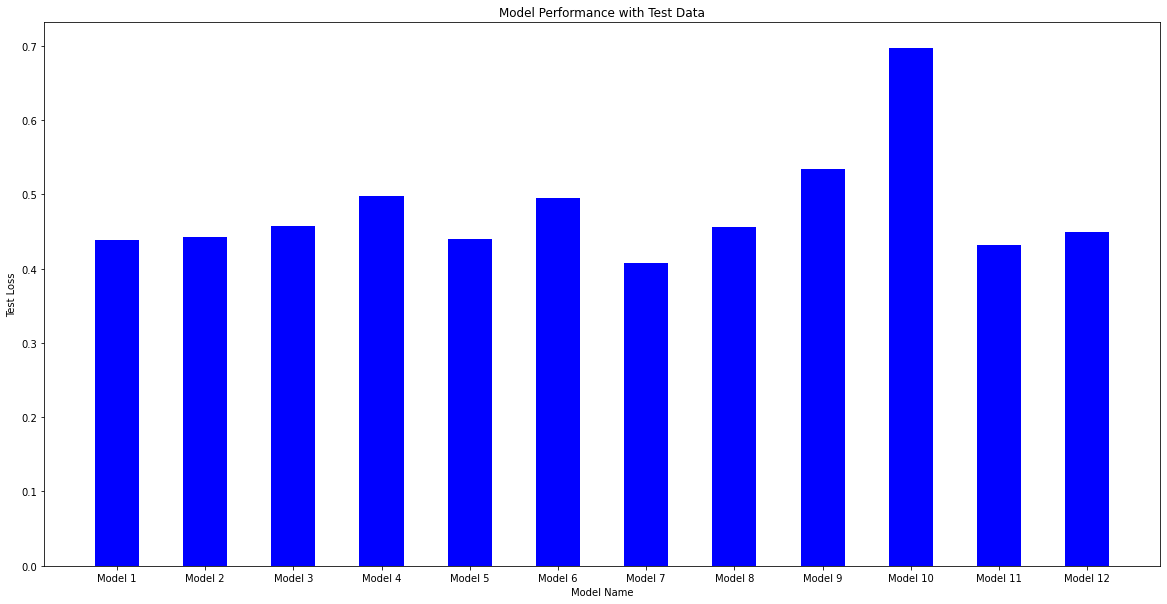

In [47]:
# Plotting the result

plt.figure(figsize = (20, 10))
plt.bar(data['Model_Name'], data['Test Loss'], color = 'blue', width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("Test Loss")
plt.title("Model Performance with Test Data")
plt.show();

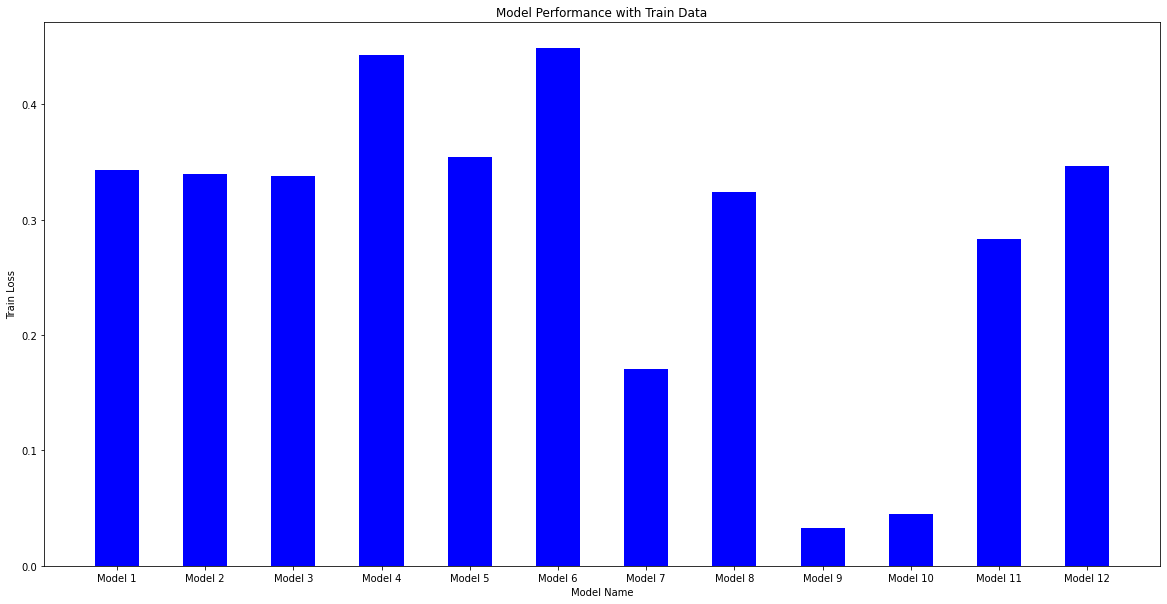

In [48]:
# Plotting the result

plt.figure(figsize = (20, 10))
plt.bar(data['Model_Name'], data['Train Loss'], color = 'blue', width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("Train Loss")
plt.title("Model Performance with Train Data")
plt.show();